In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans,AgglomerativeClustering,DBSCAN,SpectralClustering
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn import metrics



## Importing DATASET

In [2]:
data1 = pd.read_csv("C:\\Users\\Rishu Jaiswal\\Maths_Customer_Segmentation\\Customer Data.csv")
data1

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0     C10001    40.900749           0.818182      95.40              0.00   
1     C10002  3202.467416           0.909091       0.00              0.00   
2     C10003  2495.148862           1.000000     773.17            773.17   
3     C10004  1666.670542           0.636364    1499.00           1499.00   
4     C10005   817.714335           1.000000      16.00             16.00   
...      ...          ...                ...        ...               ...   
8945  C19186    28.493517           1.000000     291.12              0.00   
8946  C19187    19.183215           1.000000     300.00              0.00   
8947  C19188    23.398673           0.833333     144.40              0.00   
8948  C19189    13.457564           0.833333       0.00              0.00   
8949  C19190   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0      201.802084        139.509787          0.000000      12  
1     4103.032597       1072.340217          0.222222      12  
2      622.066742        627.284787          0.000000      12  
3        0.000000               NaN          0.000000      12  
4      678.334763        244.791237          0.000000      12  
...           ...               ...               ...     ...  
8945   325.594462         48.886365  

In [3]:
data1.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [4]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [5]:
data1.describe()

BALANCE  BALANCE_FREQUENCY     PURCHASES  ONEOFF_PURCHASES  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT       TENURE  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [6]:
data1.shape

(8950, 18)

In [7]:
data1.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

## Fill the missing value of missing data1 with mean


In [8]:
data1["MINIMUM_PAYMENTS"].mean()


864.2065423050828

In [9]:
data1['MINIMUM_PAYMENTS'] = data1['MINIMUM_PAYMENTS'].fillna(data1['MINIMUM_PAYMENTS'].mean())

In [10]:
data1["CREDIT_LIMIT"].mean()

4494.449450364621

In [11]:
data1["CREDIT_LIMIT"] = data1["CREDIT_LIMIT"].fillna(data1["CREDIT_LIMIT"].mean())

## Checking for null

In [12]:
data1.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [13]:
# checking for repeated row
data1.duplicated().sum()

0

In [14]:
# dropping the non_useable column
data1.drop(columns=["CUST_ID"],axis=1,inplace=True)

In [15]:
# Printing columns of dataset
print(data1.columns)

Index(['BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES', 'ONEOFF_PURCHASES',
       'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE', 'PURCHASES_FREQUENCY',
       'ONEOFF_PURCHASES_FREQUENCY', 'PURCHASES_INSTALLMENTS_FREQUENCY',
       'CASH_ADVANCE_FREQUENCY', 'CASH_ADVANCE_TRX', 'PURCHASES_TRX',
       'CREDIT_LIMIT', 'PAYMENTS', 'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT',
       'TENURE'],
      dtype='object')


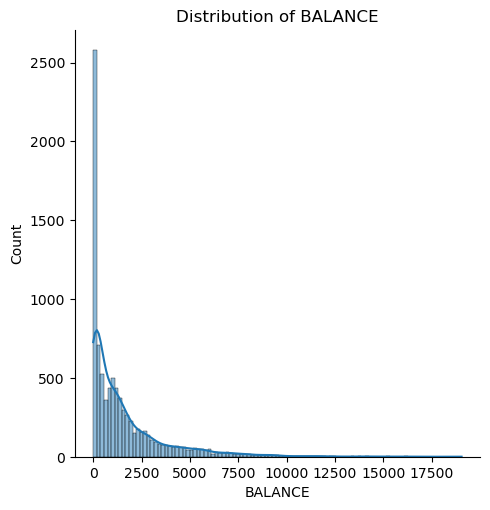

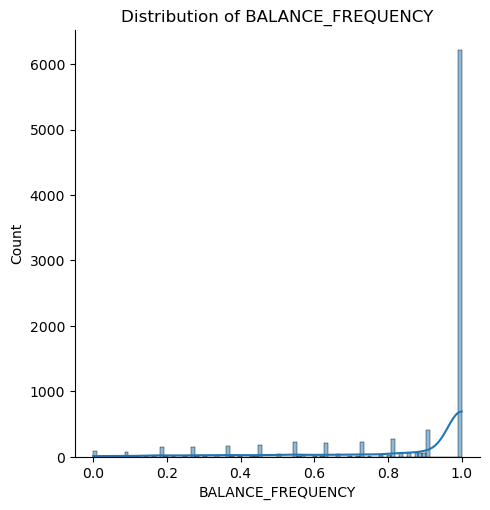

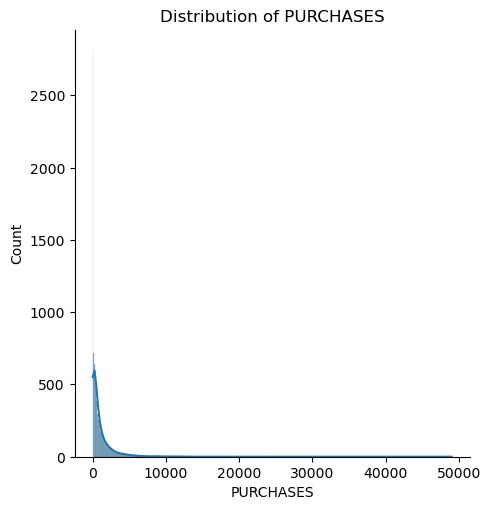

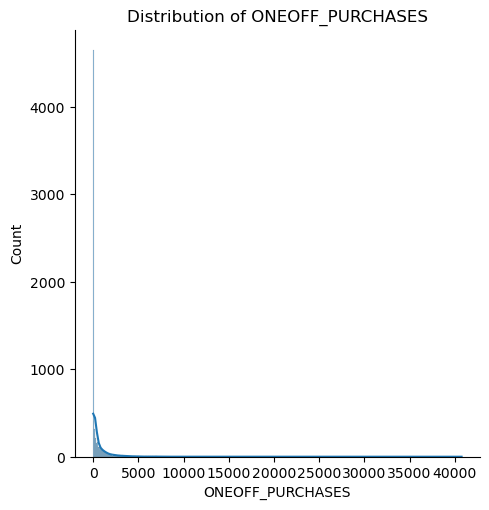

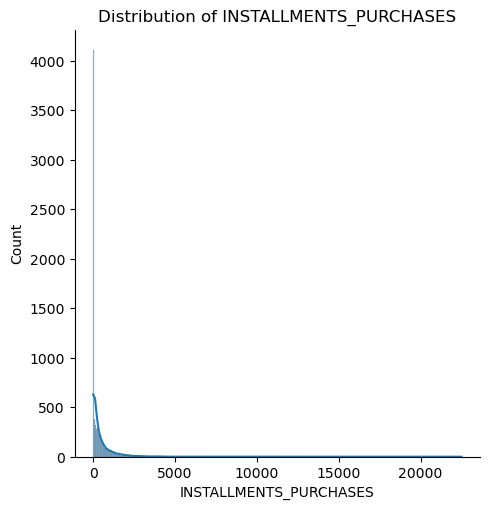

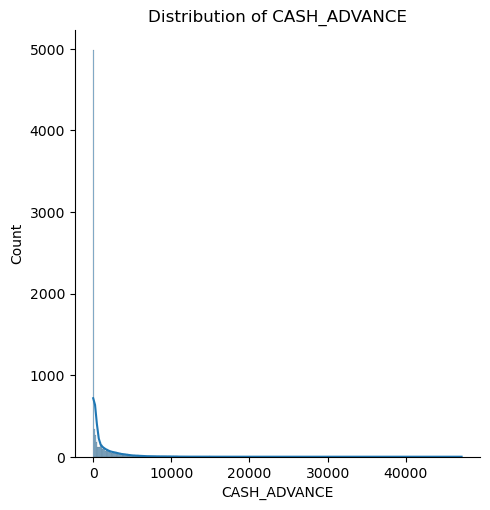

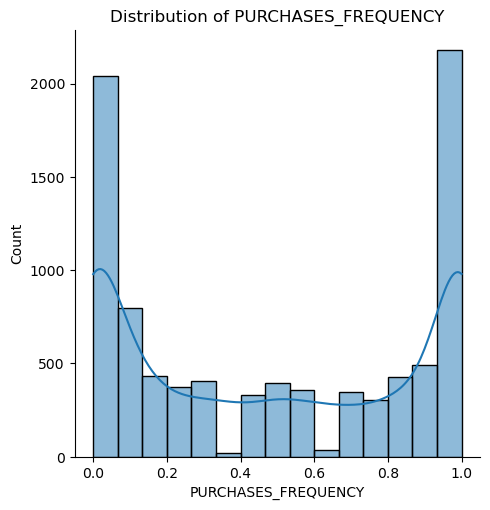

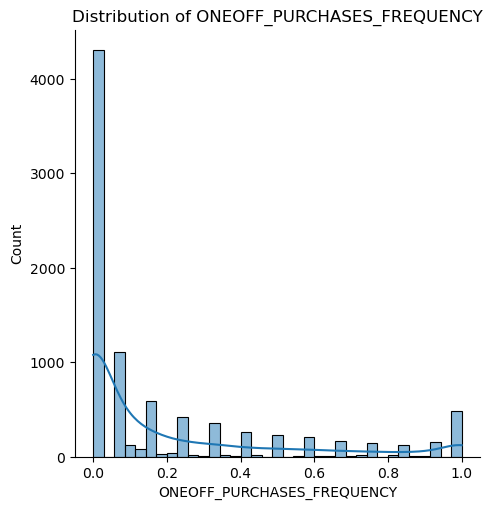

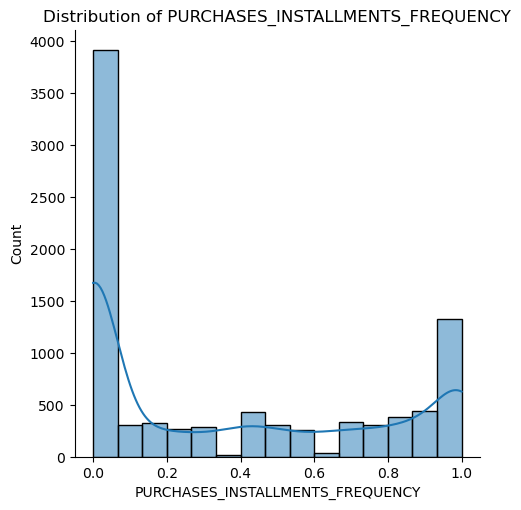

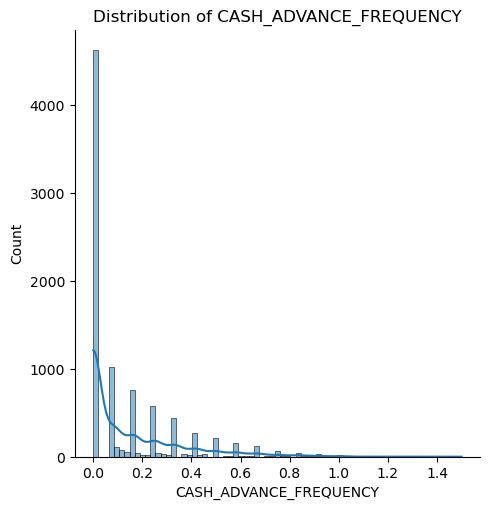

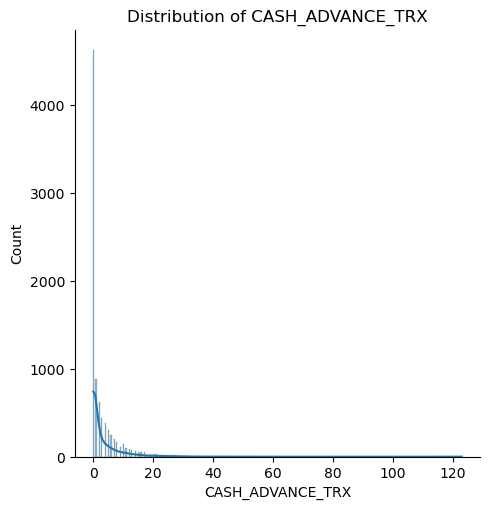

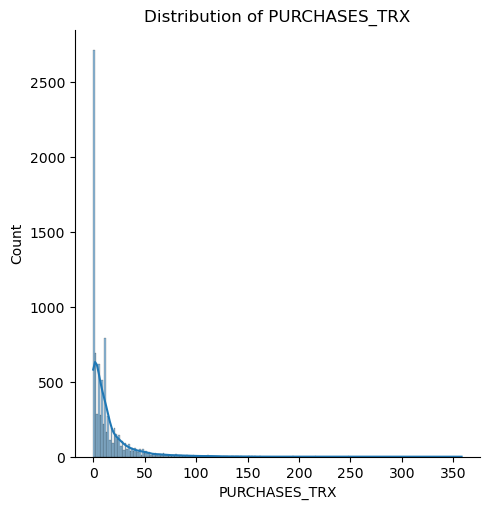

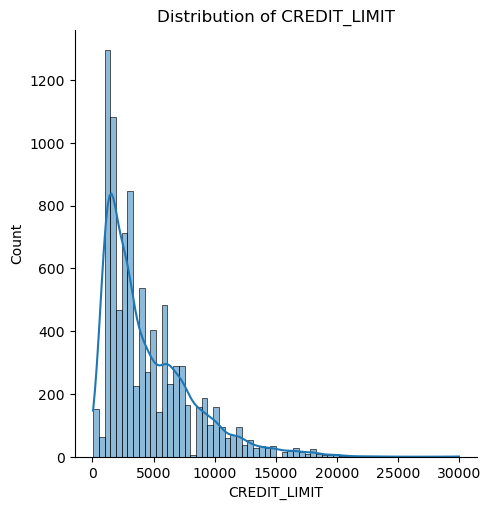

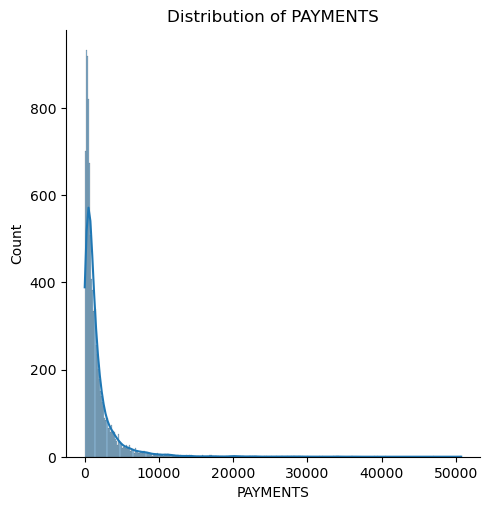

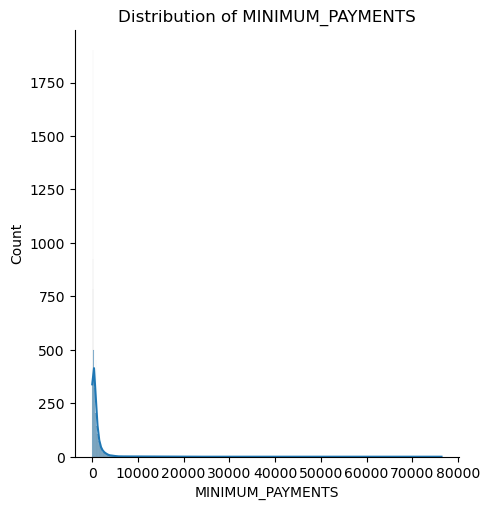

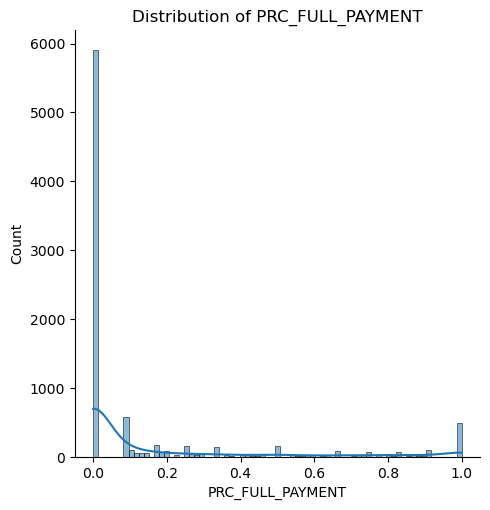

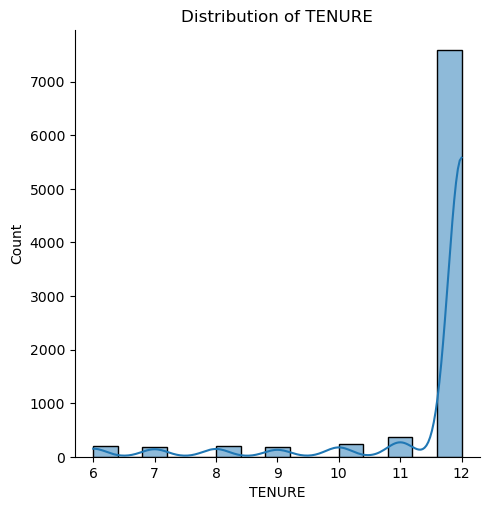

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Filter warnings related to layout changes
warnings.filterwarnings("ignore", message="The figure layout has changed to tight")

# Assuming 'data1' is your DataFrame and it has been defined earlier.

# Iterate over each column in the DataFrame
for column in data1.select_dtypes(include=['float64', 'int64']).columns:
    # Create the distribution plot for each column
    sns.displot(data1[column], kde=True)  # `kde=True` adds a Kernel Density Estimate to smooth the distribution
    plt.title(f'Distribution of {column}')  # Adds a title with the column name
    plt.show()  # Displays the plot


Correlation Matrix:
                                   BALANCE  BALANCE_FREQUENCY  PURCHASES  \
BALANCE                           1.000000           0.322412   0.181261   
BALANCE_FREQUENCY                 0.322412           1.000000   0.133674   
PURCHASES                         0.181261           0.133674   1.000000   
ONEOFF_PURCHASES                  0.164350           0.104323   0.916845   
INSTALLMENTS_PURCHASES            0.126469           0.124292   0.679896   
CASH_ADVANCE                      0.496692           0.099388  -0.051474   
PURCHASES_FREQUENCY              -0.077944           0.229715   0.393017   
ONEOFF_PURCHASES_FREQUENCY        0.073166           0.202415   0.498430   
PURCHASES_INSTALLMENTS_FREQUENCY -0.063186           0.176079   0.315567   
CASH_ADVANCE_FREQUENCY            0.449218           0.191873  -0.120143   
CASH_ADVANCE_TRX                  0.385152           0.141555  -0.067175   
PURCHASES_TRX                     0.154338           0.189626   0.68

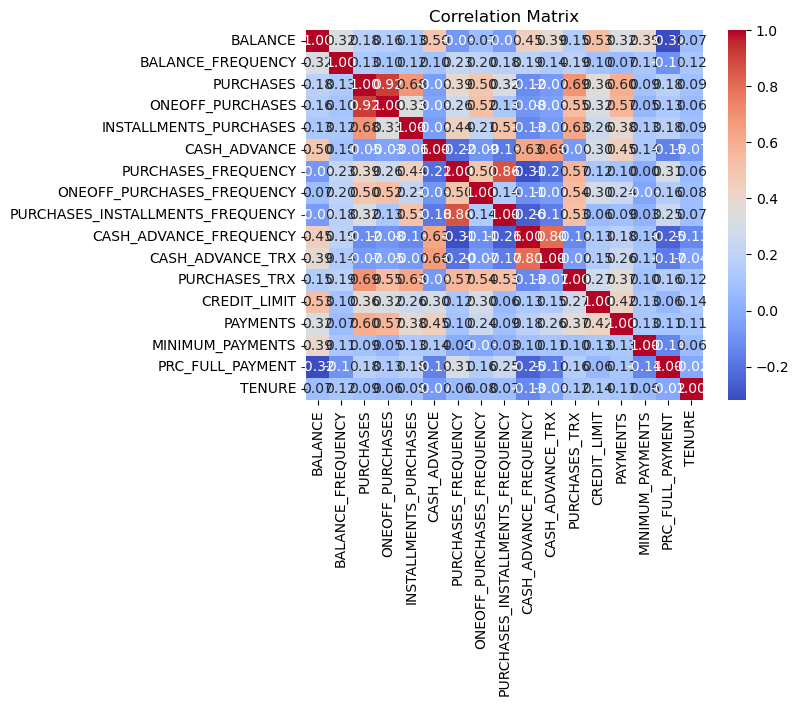

In [17]:
# Compute the correlation matrix
correlation_matrix = data1.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

# Plotting the correlation matrix as a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()




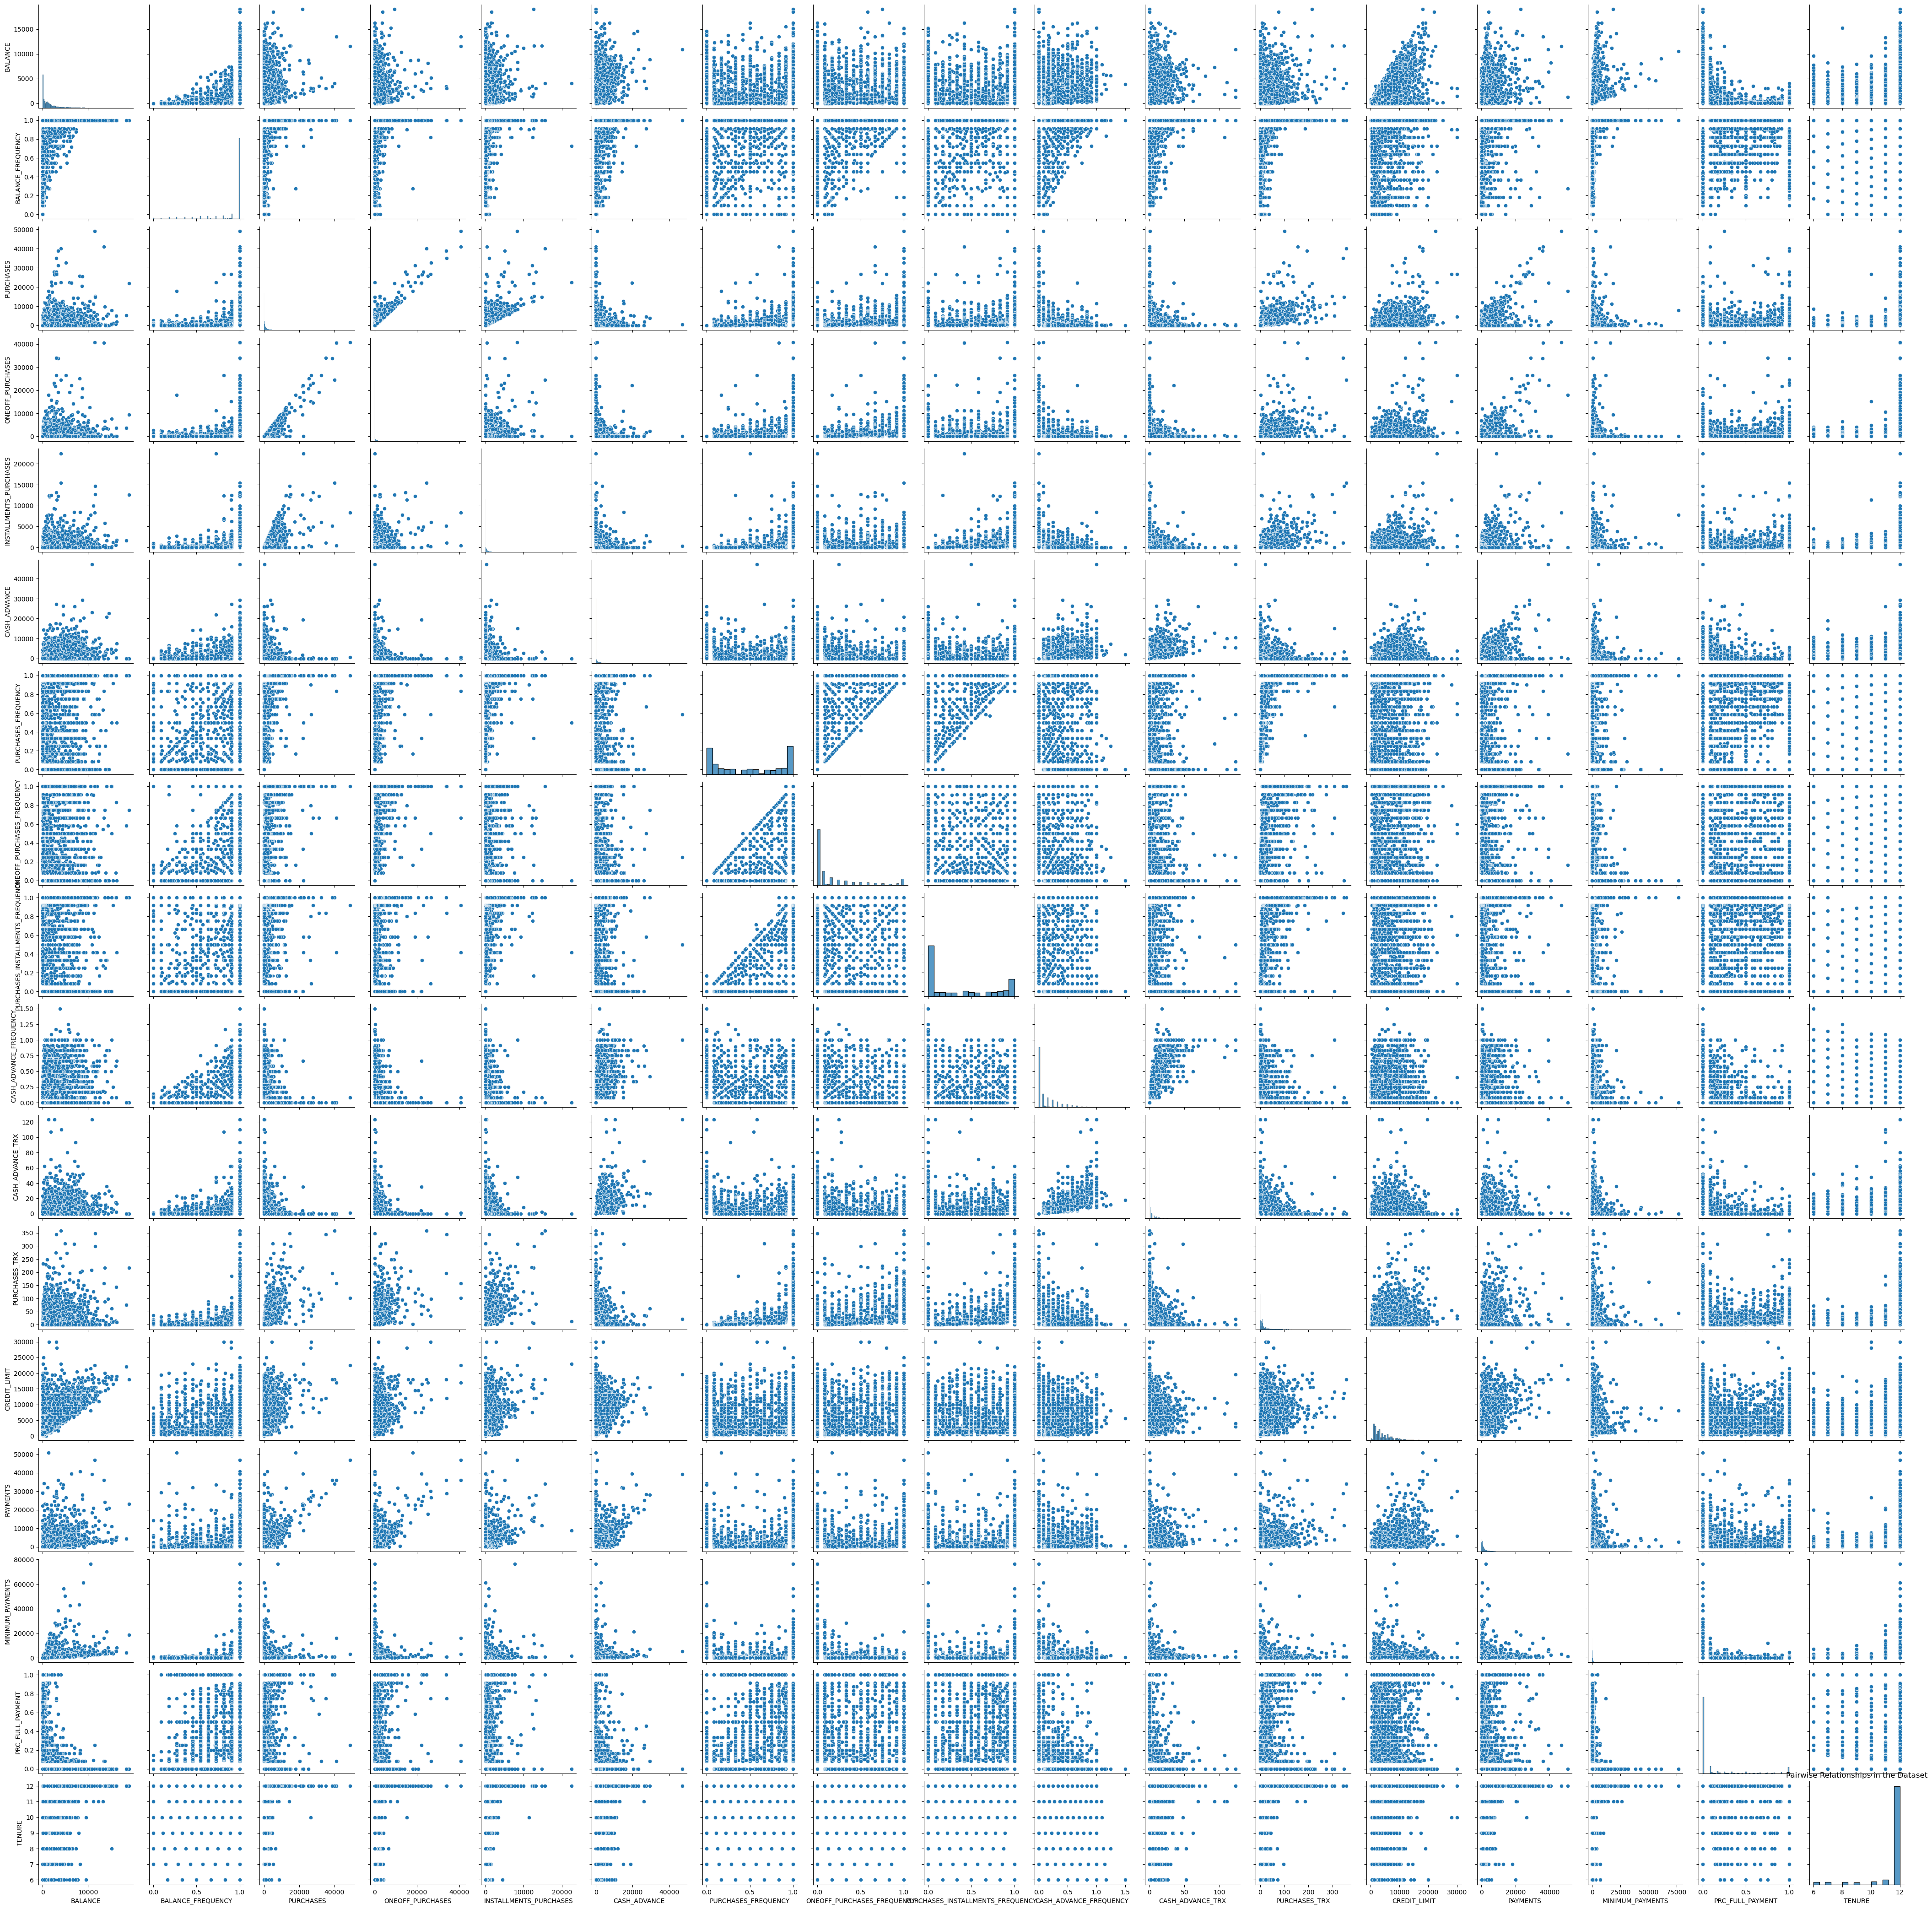

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a pairplot with hue
pairplot = sns.pairplot(data1)

# Set the title using Matplotlib
plt.title('Pairwise Relationships in the Dataset')

# Show the pairplot
plt.show()


## Scaling the DataFrame

In [19]:
scalar=StandardScaler()
scaled_data1 = scalar.fit_transform(data1)

In [20]:
pd.DataFrame(scaled_data1)

0         1         2         3         4         5         6   \
0    -0.731989 -0.249434 -0.424900 -0.356934 -0.349079 -0.466786 -0.806490   
1     0.786961  0.134325 -0.469552 -0.356934 -0.454576  2.605605 -1.221758   
2     0.447135  0.518084 -0.107668  0.108889 -0.454576 -0.466786  1.269843   
3     0.049099 -1.016953  0.232058  0.546189 -0.454576 -0.368653 -1.014125   
4    -0.358775  0.518084 -0.462063 -0.347294 -0.454576 -0.466786 -1.014125   
...        ...       ...       ...       ...       ...       ...       ...   
8945 -0.737950  0.518084 -0.333293 -0.356934 -0.132643 -0.466786  1.269843   
8946 -0.742423  0.518084 -0.329136 -0.356934 -0.122823 -0.466786  1.269843   
8947 -0.740398 -0.185477 -0.401965 -0.356934 -0.294893 -0.466786  0.854576   
8948 -0.745174 -0.185477 -0.469552 -0.356934 -0.454576 -0.449352 -1.221758   
8949 -0.572575 -0.889033  0.042146  0.301732 -0.454576 -0.406205  0.439310   

            7         8         9         10        11        12        13  \
0    -0.678661 -0.707313 -0.675349 -0.476070 -0.511333 -0.960433 -0.528979   
1    -0.678661 -0.916995  0.573963  0.110074 -0.591796  0.688639  0.818642   
2     2.673451 -0.916995 -0.675349 -0.476070 -0.109020  0.826062 -0.383805   
3    -0.399319 -0.916995 -0.258913 -0.329534 -0.551565  0.826062 -0.598688   
4    -0.399319 -0.916995 -0.675349 -0.476070 -0.551565 -0.905464 -0.364368   
...        ...       ...       ...       ...       ...       ...       ...   
8945 -0.678661  1.179833 -0.675349 -0.476070 -0.350408 -0.960433 -0.486217   
8946 -0.678661  1.179833 -0.675349 -0.476070 -0.350408 -0.960433 -0.503396   
8947 -0.678661  0.760469 -0.675349 -0.476070 -0.390639 -0.960433 -0.570615   
8948 -0.678661 -0.916995  0.157527 -0.182998 -0.591796 -1.097856 -0.580536   
8949  1.556082 -0.916995  0.990398 -0.182998  0.333524 -0.905464 -0.576869   

                14        15        16  
0    -3.109675e-01 -0.525551  0.360680  
1     8.931021e-02  0.234227  0.360680  
2    -1.016632e-01 -0.525551  0.360680  
3     4.878305e-17 -0.525551  0.360680  
4    -2.657913e-01 -0.525551  0.360680  
...            ...       ...       ...  
8945 -3.498541e-01  1.183951 -4.122768  
8946  4.878305e-17 -0.525551 -4.122768  
8947 -3.354655e-01  0.329200 -4.122768  
8948 -3.469065e-01  0.329200 -4.122768  
8949 -3.329464e-01 -0.525551 -4.122768  

[8950 rows x 17 columns]

## Dimensionality reduction to 2D for better visualization

In [21]:
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data1)
pca_data1 = pd.DataFrame(data=principal_components ,columns=["PCA1","PCA2"])
pca_data1

PCA1      PCA2
0    -1.682220 -1.076446
1    -1.138299  2.506450
2     0.969683 -0.383539
3    -0.873630  0.043159
4    -1.599432 -0.688569
...        ...       ...
8945 -0.359626 -2.016123
8946 -0.564367 -1.639103
8947 -0.926201 -1.810763
8948 -2.336549 -0.657943
8949 -0.556423 -0.400483

[8950 rows x 2 columns]

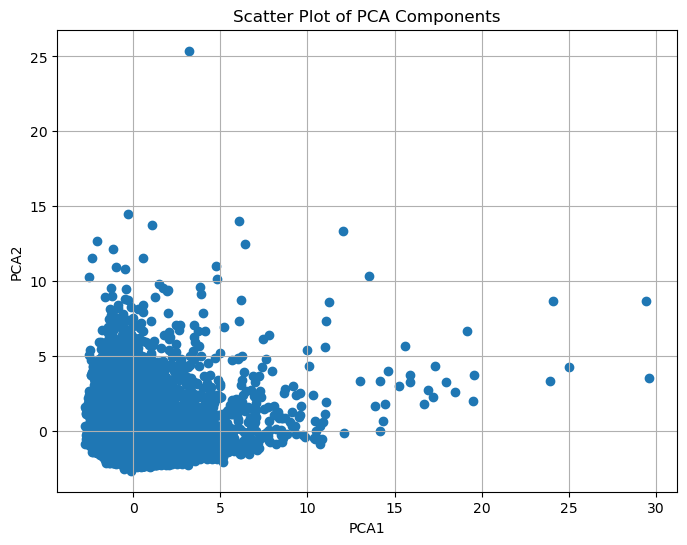

In [22]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(pca_data1['PCA1'], pca_data1['PCA2'], alpha=1)
plt.title('Scatter Plot of PCA Components')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.grid(True)
plt.show()


## Find the 'k' value by Elbow Method

C:\Users\Rishu Jaiswal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rishu Jaiswal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rishu Jaiswal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Rishu Jaiswal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to

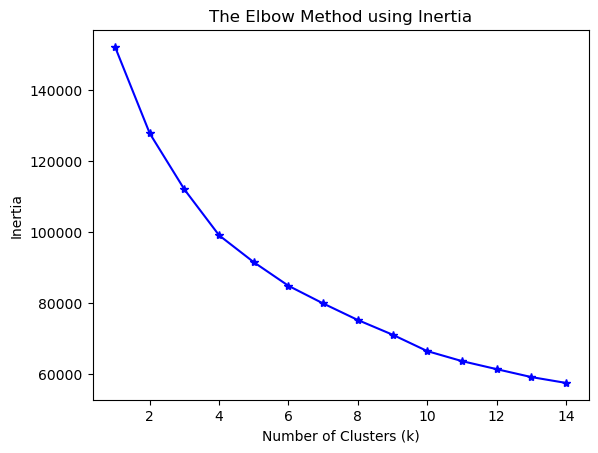

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming 'scaled_data1' is your scaled data (features).

inertia = []
range_val = range(1, 15)

for i in range_val:
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(pd.DataFrame(scaled_data1))
    inertia.append(kmeans.inertia_)

plt.plot(range_val, inertia, 'b*-')  # Use 'b*-' for blue lines with asterisk markers
plt.xlabel('Number of Clusters (k)') 
plt.ylabel('Inertia') 
plt.title('The Elbow Method using Inertia') 
plt.show()


## K_means Clustering

In [24]:
kmeans_model=KMeans(4)
kmeans_model.fit_predict(scaled_data1)
# Concatenating pca_data and KMeans cluster labels
pca_data1_kmeans= pd.concat([pca_data1,pd.DataFrame({'cluster':kmeans_model.labels_})],axis=1)



C:\Users\Rishu Jaiswal\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [25]:
pca_data1_kmeans

PCA1      PCA2  cluster
0    -1.682220 -1.076446        3
1    -1.138299  2.506450        2
2     0.969683 -0.383539        1
3    -0.873630  0.043159        3
4    -1.599432 -0.688569        3
...        ...       ...      ...
8945 -0.359626 -2.016123        1
8946 -0.564367 -1.639103        1
8947 -0.926201 -1.810763        1
8948 -2.336549 -0.657943        3
8949 -0.556423 -0.400483        3

[8950 rows x 3 columns]

## Spectral clustering

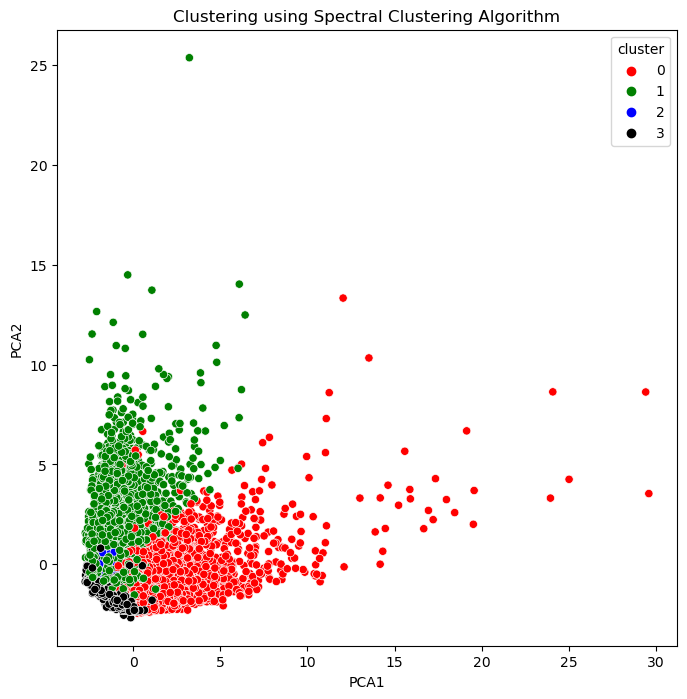

In [26]:
import pandas as pd
from sklearn.cluster import SpectralClustering
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming scaled_data1 is your preprocessed data that you wish to cluster
spectral_model = SpectralClustering(n_clusters=4, affinity='nearest_neighbors')
cluster_labels = spectral_model.fit_predict(scaled_data1)

# Concatenating pca_data1 and Spectral Clustering cluster labels
# Assuming pca_data1 is your PCA-transformed data
# Ensuring the PCA column names match your plotting code ('PCA1', 'PCA2')
pca_data1_spectral = pd.concat([pca_data1.rename(columns={'PC1': 'PCA1', 'PC2': 'PCA2'}), 
                                pd.DataFrame({'cluster': cluster_labels})], axis=1)

# Plotting using seaborn
plt.figure(figsize=(8, 8))
ax = sns.scatterplot(x="PCA1", y="PCA2", hue="cluster", data=pca_data1_spectral, 
                     palette=['red', 'green', 'blue', 'black'])
plt.title("Clustering using Spectral Clustering Algorithm")
plt.show()


In [27]:
# Assuming scaled_data1 is your preprocessed data that you wish to cluster
spectral_model = SpectralClustering(n_clusters=4, affinity='nearest_neighbors')
cluster_labels = spectral_model.fit_predict(scaled_data1)

# Now cluster_labels contains the array of cluster assignments
# Example usage:
print(cluster_labels)  # This will print the cluster labels for each data point

# If you want to inspect or process these labels further, you can simply use cluster_labels
unique_clusters = set(cluster_labels)
print("Unique Clusters:", unique_clusters)  # Prints the unique cluster labels


[0 2 1 ... 3 2 2]
Unique Clusters: {0, 1, 2, 3}


## Visualizing the clustered Pca_label_data 

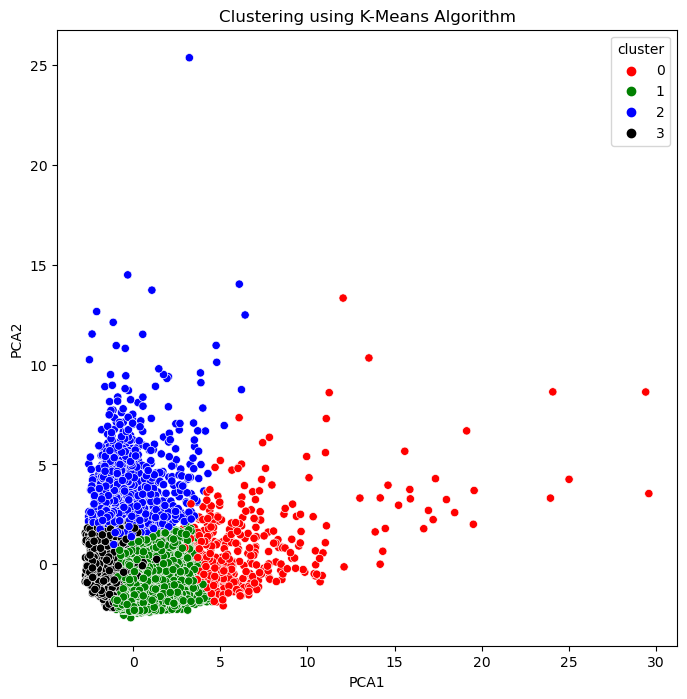

In [28]:
plt.figure(figsize=(8,8))
ax=sns.scatterplot(x="PCA1",y="PCA2",hue="cluster",data=pca_data1_kmeans,palette=['red','green','blue','black'])
plt.title("Clustering using K-Means Algorithm")
plt.show()

In [29]:
# find all cluster centers
cluster_centers = pd.DataFrame(data=kmeans_model.cluster_centers_,columns=[data1.columns])
# inverse transform the data
cluster_centers = scalar.inverse_transform(cluster_centers)
cluster_centers = pd.DataFrame(data=cluster_centers,columns=[data1.columns])
cluster_centers

BALANCE BALANCE_FREQUENCY    PURCHASES ONEOFF_PURCHASES  \
0  3551.153761          0.986879  7681.620098      5095.878826   
1   894.907458          0.934734  1236.178934       593.974874   
2  4602.462714          0.968415   501.896219       320.373681   
3  1011.751528          0.789871   269.973466       209.853863   

  INSTALLMENTS_PURCHASES CASH_ADVANCE PURCHASES_FREQUENCY  \
0            2587.208264   653.638891            0.946418   
1             642.478274   210.570626            0.885165   
2             181.607404  4520.724309            0.287731   
3              60.386625   595.759339            0.170146   

  ONEOFF_PURCHASES_FREQUENCY PURCHASES_INSTALLMENTS_FREQUENCY  \
0                   0.739031                         0.788060   
1                   0.297070                         0.711842   
2                   0.138934                         0.185516   
3                   0.086281                         0.080578   

  CASH_ADVANCE_FREQUENCY CASH_ADVANCE_TRX PURCHASES_TRX CREDIT_LIMIT  \
0               0.071290         2.085575     89.359413  9696.943765   
1               0.042573         0.790021     22.091773  4213.207678   
2               0.484526        14.284641      7.661102  7546.957050   
3               0.114833         2.125503      2.903421  3277.703165   

      PAYMENTS MINIMUM_PAYMENTS PRC_FULL_PAYMENT     TENURE  
0  7288.739497      1976.815179         0.286707  11.951100  
1  1332.194205       650.167072         0.269258  11.594595  
2  3481.145990      2008.251157         0.034859  11.387312  
3   974.505090       586.301239         0.078001  11.446429

In [30]:
# Creating a target column "Cluster" for storing the cluster segment
cluster_data1 = pd.concat([data1,pd.DataFrame({'Cluster':kmeans_model.labels_})],axis=1)
cluster_data1

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
1     3202.467416           0.909091       0.00              0.00   
2     2495.148862           1.000000     773.17            773.17   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
...           ...                ...        ...               ...   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                      95.40      0.000000             0.166667   
1                       0.00   6442.945483             0.000000   
2                       0.00      0.000000             1.000000   
3                       0.00    205.788017             0.083333   
4                       0.00      0.000000             0.083333   
...                      ...           ...                  ...   
8945                  291.12      0.000000             1.000000   
8946                  300.00      0.000000             1.000000   
8947                  144.40      0.000000             0.833333   
8948                    0.00     36.558778             0.000000   
8949                    0.00    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
1                       0.000000                          0.000000   
2                       1.000000                          0.000000   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
...                          ...                               ...   
8945                    0.000000                          0.833333   
8946                    0.000000                          0.833333   
8947                    0.000000                          0.666667   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
1                   0.250000                 4              0        7000.0   
2                   0.000000                 0             12        7500.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
...                      ...               ...            ...           ...   
8945                0.000000                 0              6        1000.0   
8946                0.000000                 0              6        1000.0   
8947                0.000000                 0              5        1000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0      201.802084        139.509787          0.000000      12        3  
1     4103.032597       1072.340217          0.222222      12        2  
2      622.066742        627.284787          0.000000      12        1  
3        0.000000        864.206542          0.000000      12        3  
4      678.334763        244.791237          0.000000      12        3  
...           ...               ...               ...     ...      ...  
8945   325.594462         48.886365          0.500000       6        1  
89

In [31]:
cluster_1_data1 = cluster_data1[cluster_data1["Cluster"]==0]
cluster_1_data1

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
6      627.260806           1.000000    7091.01           6402.63   
21    6369.531318           1.000000    6359.95           5910.04   
57    2386.330629           1.000000    5217.62           4789.09   
84    1935.362486           1.000000    4915.60           4515.34   
90    9381.255094           1.000000    5100.07           1147.83   
...           ...                ...        ...               ...   
8215  4436.557694           1.000000    6005.90           5838.38   
8541  3326.323283           1.000000    8209.77           2218.28   
8662   599.909949           1.000000    4947.32           3149.59   
8689   368.318662           0.909091    8053.95           8053.95   
8737  2533.618119           0.909091    5633.83           2985.92   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
6                     688.38      0.000000             1.000000   
21                    449.91    229.028245             1.000000   
57                    428.53      0.000000             0.916667   
84                    400.26    293.844792             1.000000   
90                   3952.24    370.737197             1.000000   
...                      ...           ...                  ...   
8215                  167.52    567.971877             1.000000   
8541                 5991.49      0.000000             1.000000   
8662                 1797.73      0.000000             1.000000   
8689                    0.00      0.000000             0.833333   
8737                 2647.91   2451.807788             0.916667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
6                       1.000000                          1.000000   
21                      0.916667                          1.000000   
57                      0.916667                          0.500000   
84                      1.000000                          0.333333   
90                      0.250000                          0.916667   
...                          ...                               ...   
8215                    0.583333                          0.916667   
8541                    0.416667                          1.000000   
8662                    1.000000                          0.916667   
8689                    0.833333                          0.000000   
8737                    0.500000                          0.750000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
6                   0.000000                 0             64       13500.0   
21                  0.333333                 6             92       11250.0   
57                  0.000000                 0             42        7500.0   
84                  0.083333                 1             50        9000.0   
90                  0.083333                 1             46        9000.0   
...                      ...               ...            ...           ...   
8215                0.083333                 1             61       10500.0   
8541                0.000000                 0            130       10000.0   
8662                0.000000                 0             73        3000.0   
8689                0.000000                 0             46        2000.0   
8737                0.333333                16             82        9000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
6     6354.314328        198.065894          1.000000      12        0  
21    2077.959051       1659.775075          0.000000      12        0  
57    5678.729613       1311.514878          0.083333      12        0  
84    4921.066897        594.756686          0.000000      12        0  
90    6409.496345       9827.045323          0.000000      12        0  
...           ...               ...               ...     ...      ...  
8215  1650.425296       1067.515656          0.000000      12        0  
85

In [32]:
cluster_2_data1 = cluster_data1[cluster_data1["Cluster"]==1]
cluster_2_data1

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
2     2495.148862           1.000000     773.17            773.17   
5     1809.828751           1.000000    1333.28              0.00   
7     1823.652743           1.000000     436.20              0.00   
10    1293.124939           1.000000     920.12              0.00   
12    1516.928620           1.000000    3217.99           2500.23   
...           ...                ...        ...               ...   
8940   130.838554           1.000000     591.24              0.00   
8942    40.829749           1.000000     113.28              0.00   
8945    28.493517           1.000000     291.12              0.00   
8946    19.183215           1.000000     300.00              0.00   
8947    23.398673           0.833333     144.40              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
2                       0.00           0.0             1.000000   
5                    1333.28           0.0             0.666667   
7                     436.20           0.0             1.000000   
10                    920.12           0.0             1.000000   
12                    717.76           0.0             1.000000   
...                      ...           ...                  ...   
8940                  591.24           0.0             1.000000   
8942                  113.28           0.0             1.000000   
8945                  291.12           0.0             1.000000   
8946                  300.00           0.0             1.000000   
8947                  144.40           0.0             0.833333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
2                           1.00                          0.000000   
5                           0.00                          0.583333   
7                           0.00                          1.000000   
10                          0.00                          1.000000   
12                          0.25                          0.916667   
...                          ...                               ...   
8940                        0.00                          0.833333   
8942                        0.00                          0.833333   
8945                        0.00                          0.833333   
8946                        0.00                          0.833333   
8947                        0.00                          0.666667   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
2                        0.0                 0             12        7500.0   
5                        0.0                 0              8        1800.0   
7                        0.0                 0             12        2300.0   
10                       0.0                 0             12        1200.0   
12                       0.0                 0             26        3000.0   
...                      ...               ...            ...           ...   
8940                     0.0                 0              6        1000.0   
8942                     0.0                 0              6        1000.0   
8945                     0.0                 0              6        1000.0   
8946                     0.0                 0              6        1000.0   
8947                     0.0                 0              5        1000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
2      622.066742        627.284787              0.00      12        1  
5     1400.057770       2407.246035              0.00      12        1  
7      679.065082        532.033990              0.00      12        1  
10    1083.301007       2172.697765              0.00      12        1  
12     608.263689        490.207013              0.25      12        1  
...           ...               ...               ...     ...      ...  
8940   475.523262         82.771320              1.00       6        1  
89

In [33]:
cluster_3_data1 = cluster_data1[cluster_data1["Cluster"]==2]
cluster_3_data1

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
1     3202.467416           0.909091       0.00              0.00   
15    6886.213231           1.000000    1611.70              0.00   
23    3800.151377           0.818182    4248.35           3454.56   
24    5368.571219           1.000000       0.00              0.00   
28    7152.864372           1.000000     387.05            204.55   
...           ...                ...        ...               ...   
8857  2330.222764           1.000000    1320.00              0.00   
8858   812.934042           1.000000      50.00             50.00   
8869  2171.222526           1.000000     791.18            791.18   
8915   381.341657           1.000000      78.00              0.00   
8941  5967.475270           0.833333     214.55              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
1                       0.00   6442.945483             0.000000   
15                   1611.70   2301.491267             0.500000   
23                    793.79   7974.415626             1.000000   
24                      0.00    798.949863             0.000000   
28                    182.50   2236.145259             0.666667   
...                      ...           ...                  ...   
8857                 1320.00  14926.790590             0.428571   
8858                    0.00   2185.500596             0.142857   
8869                    0.00   2056.602480             0.428571   
8915                   78.00    934.808869             1.000000   
8941                  214.55   8555.409326             0.833333   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
1                       0.000000                          0.000000   
15                      0.000000                          0.500000   
23                      0.083333                          0.916667   
24                      0.000000                          0.000000   
28                      0.166667                          0.416667   
...                          ...                               ...   
8857                    0.000000                          0.285714   
8858                    0.142857                          0.000000   
8869                    0.428571                          0.000000   
8915                    0.000000                          0.833333   
8941                    0.000000                          0.666667   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
1                   0.250000                 4              0        7000.0   
15                  0.166667                 4             11        8000.0   
23                  0.333333                13             13        9000.0   
24                  0.363636                 4              0        6000.0   
28                  0.833333                16              8       10500.0   
...                      ...               ...            ...           ...   
8857                0.571429                10              3       10000.0   
8858                1.000000                16              1        3000.0   
8869                0.571429                 6              8        3000.0   
8915                0.666667                16              6        1000.0   
8941                0.666667                13              5        9000.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
1     4103.032597       1072.340217          0.222222      12        2  
15    1993.439277       2109.906490          0.000000      12        2  
23    9479.043842       1425.426525          0.000000      12        2  
24    1422.726707       1657.002877          0.000000      11        2  
28    1601.448347       1648.851345          0.000000      12        2  
...           ...               ...               ...     ...      ...  
8857  8157.666434        283.362434          0.200000       7        2  
88

In [34]:
cluster_4_data1 = cluster_data1[cluster_data1["Cluster"] == 3]
cluster_4_data1


BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0       40.900749           0.818182      95.40              0.00   
3     1666.670542           0.636364    1499.00           1499.00   
4      817.714335           1.000000      16.00             16.00   
8     1014.926473           1.000000     861.49            661.49   
9      152.225975           0.545455    1281.60           1281.60   
...           ...                ...        ...               ...   
8939   728.352548           1.000000     734.40            734.40   
8943     5.871712           0.500000      20.90             20.90   
8944   193.571722           0.833333    1012.73           1012.73   
8948    13.457564           0.833333       0.00              0.00   
8949   372.708075           0.666667    1093.25           1093.25   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                       95.4      0.000000             0.166667   
3                        0.0    205.788017             0.083333   
4                        0.0      0.000000             0.083333   
8                      200.0      0.000000             0.333333   
9                        0.0      0.000000             0.166667   
...                      ...           ...                  ...   
8939                     0.0    239.891038             0.333333   
8943                     0.0      0.000000             0.166667   
8944                     0.0      0.000000             0.333333   
8948                     0.0     36.558778             0.000000   
8949                     0.0    127.040008             0.666667   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                       0.000000                          0.083333   
3                       0.083333                          0.000000   
4                       0.083333                          0.000000   
8                       0.083333                          0.250000   
9                       0.166667                          0.000000   
...                          ...                               ...   
8939                    0.333333                          0.000000   
8943                    0.166667                          0.000000   
8944                    0.333333                          0.000000   
8948                    0.000000                          0.000000   
8949                    0.666667                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                   0.000000                 0              2        1000.0   
3                   0.083333                 1              1        7500.0   
4                   0.000000                 0              1        1200.0   
8                   0.000000                 0              5        7000.0   
9                   0.000000                 0              3       11000.0   
...                      ...               ...            ...           ...   
8939                0.166667                 2              2        1000.0   
8943                0.000000                 0              1         500.0   
8944                0.000000                 0              2        4000.0   
8948                0.166667                 2              0         500.0   
8949                0.333333                 2             23        1200.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  Cluster  
0      201.802084        139.509787              0.00      12        3  
3        0.000000        864.206542              0.00      12        3  
4      678.334763        244.791237              0.00      12        3  
8      688.278568        311.963409              0.00      12        3  
9     1164.770591        100.302262              0.00      12        3  
...           ...               ...               ...     ...      ...  
8939    72.530037        110.950798              0.00       6        3  
89

<Axes: xlabel='Cluster', ylabel='count'>

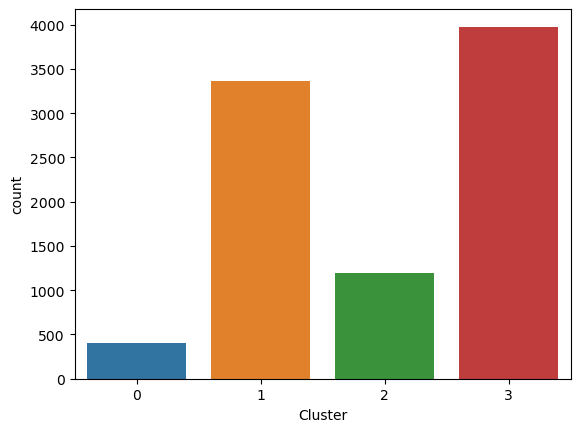

In [35]:
#Visualization
sns.countplot(x='Cluster', data=cluster_data1)


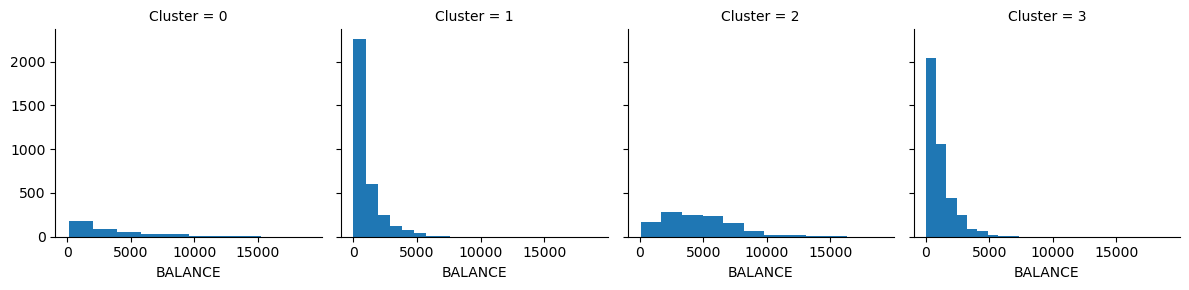

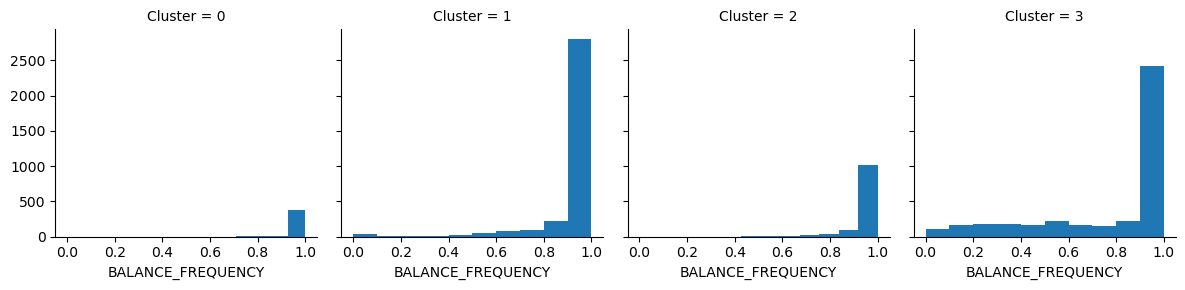

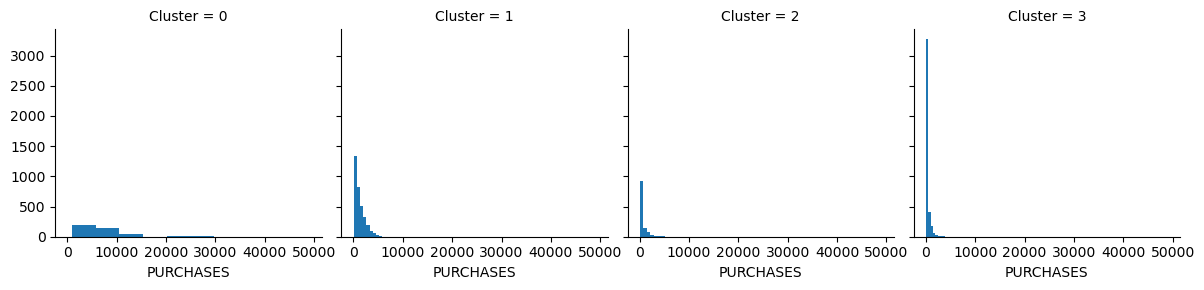

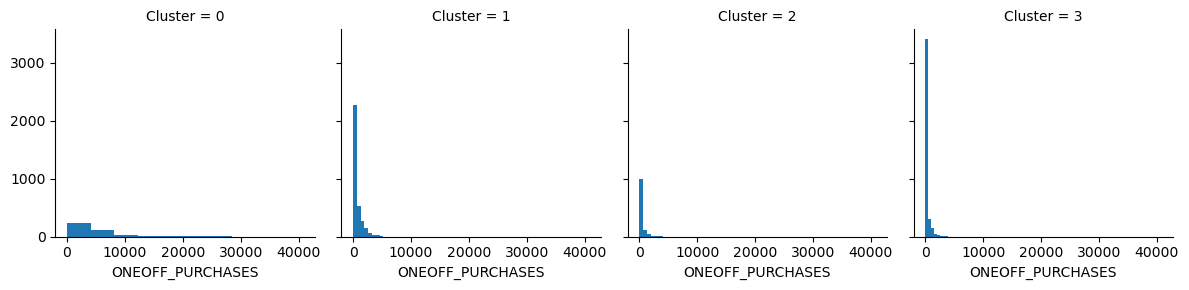

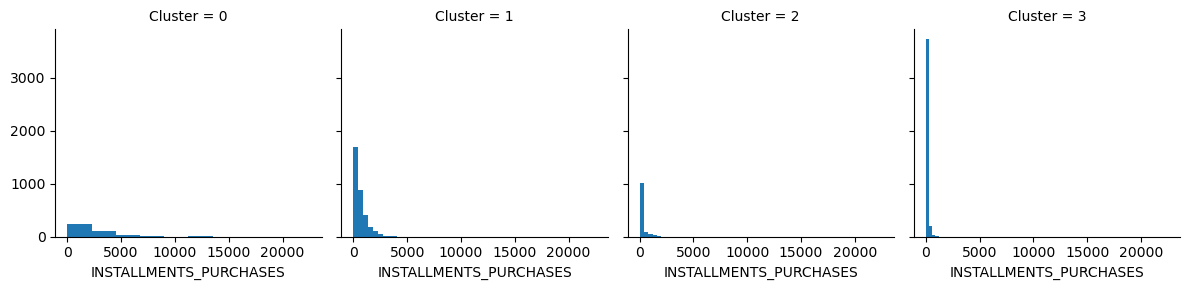

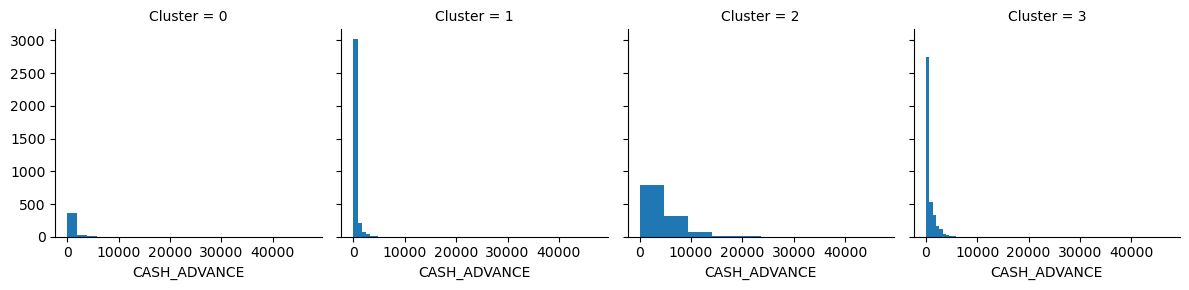

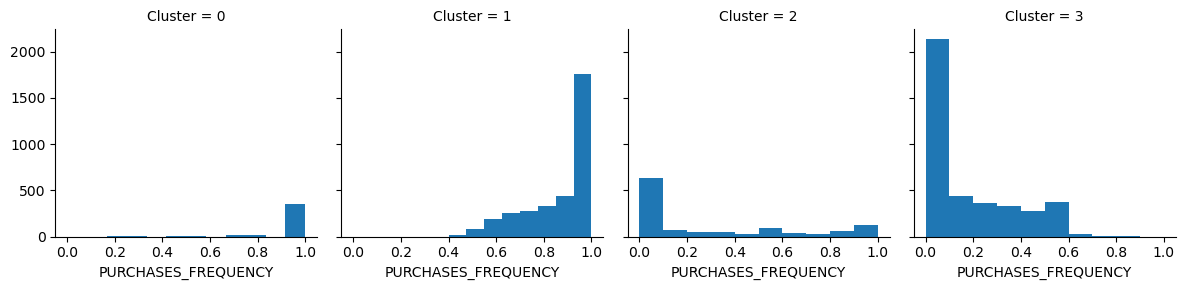

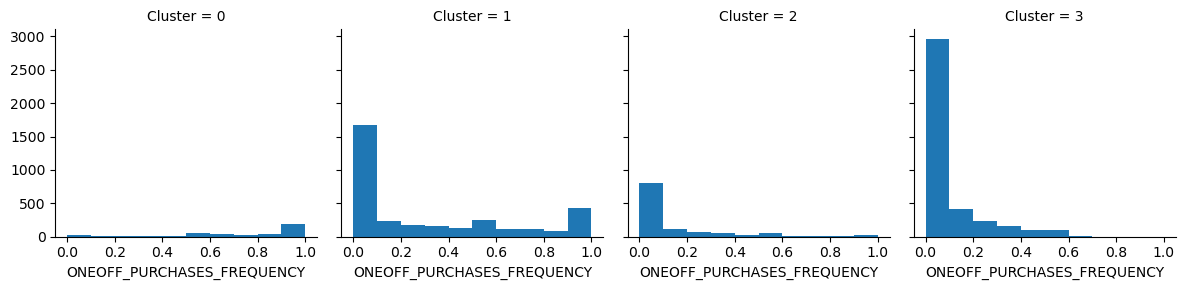

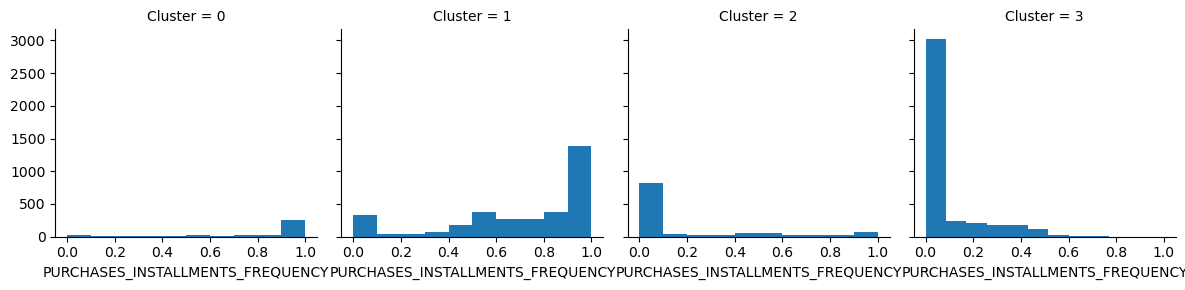

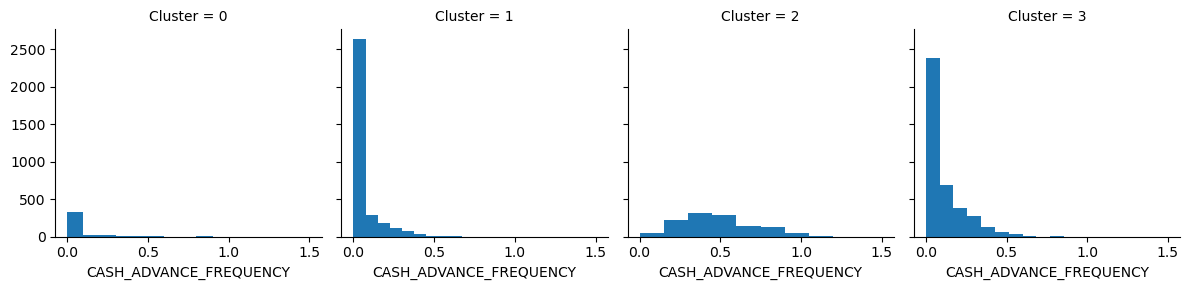

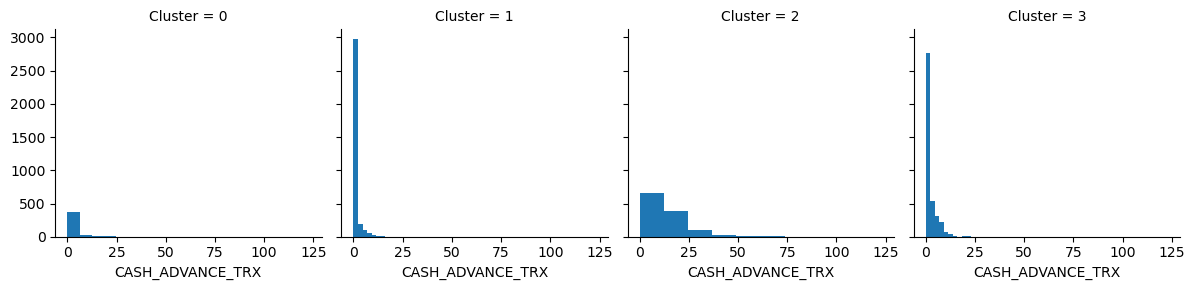

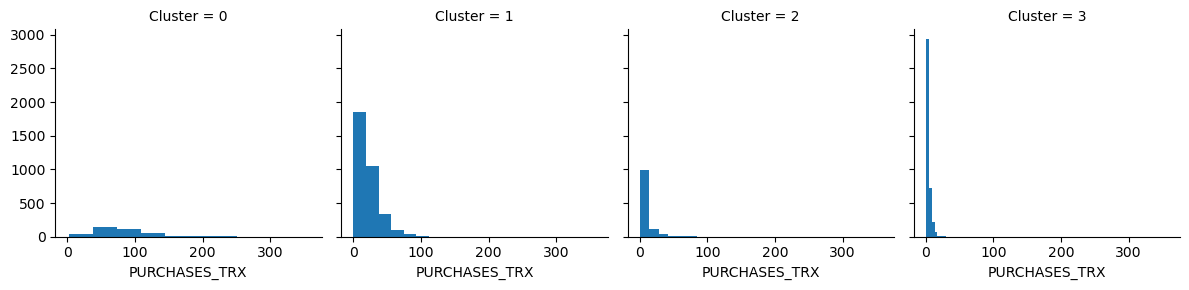

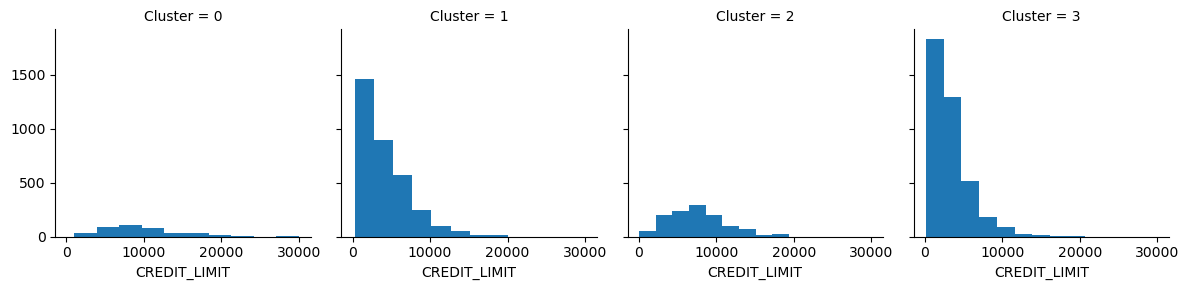

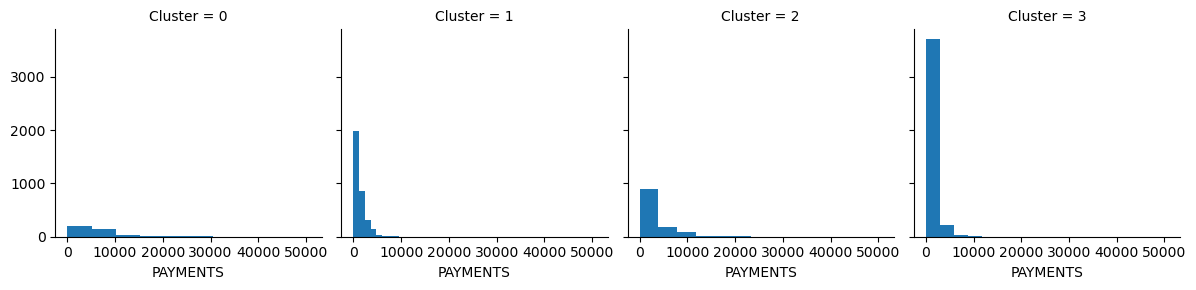

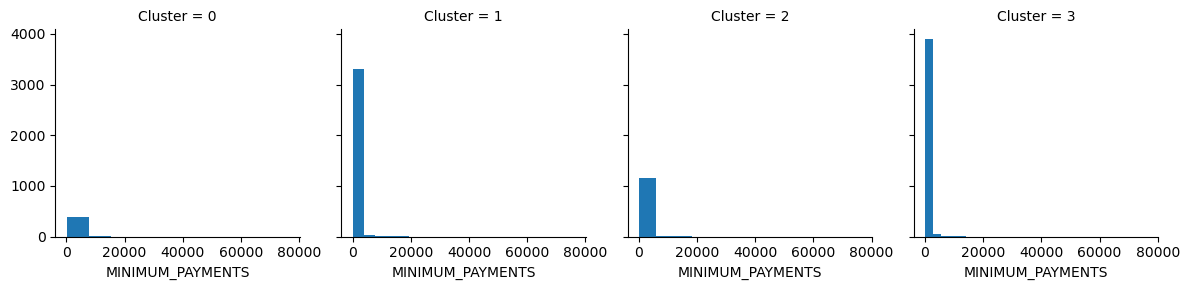

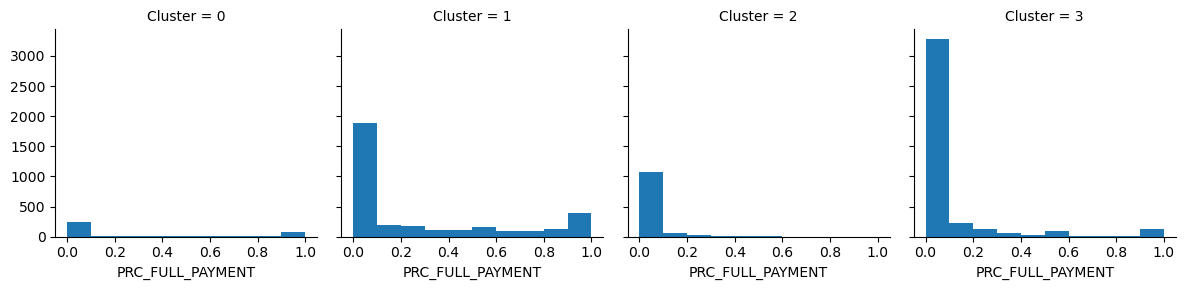

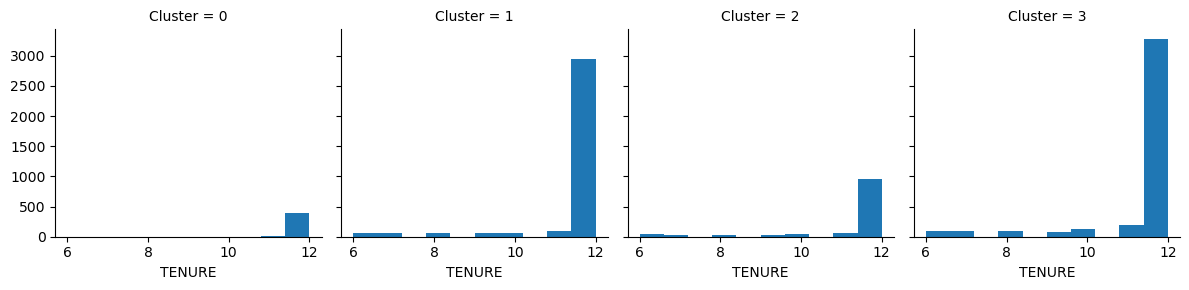

In [36]:
for c in cluster_data1.drop(['Cluster'],axis=1):
    grid= sns.FacetGrid(cluster_data1, col='Cluster')
    grid= grid.map(plt.hist, c)
plt.show()

## Saving kmeans model

In [37]:
#Saving Scikitlearn models
import joblib
joblib.dump(kmeans_model, "kmeans_model.pkl")

['kmeans_model.pkl']

## Saving data with kmeans cluster label

In [38]:
cluster_data1.to_csv("Clustered_Customer_Data.csv")

## Spliting the Data

In [39]:
X = cluster_data1.drop(['Cluster'],axis=1)
y= cluster_data1[['Cluster']]
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2)


In [40]:
X_train

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
7258  2347.383015           1.000000       0.00              0.00   
1658    92.898327           1.000000     546.00             46.00   
6836    34.600595           0.454545     359.50              0.00   
2424  2537.257188           1.000000       0.00              0.00   
1176   229.913693           1.000000    2406.77           1955.67   
...           ...                ...        ...               ...   
556   3294.379550           1.000000       0.00              0.00   
7651   180.238427           1.000000    2749.92              0.00   
1097     6.338717           0.090909     171.00            171.00   
6293  6557.146926           1.000000     354.27            354.27   
21    6369.531318           1.000000    6359.95           5910.04   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
7258                    0.00   1480.171443             0.000000   
1658                  500.00      0.000000             0.500000   
6836                  359.50      0.000000             0.416667   
2424                    0.00    557.526465             0.000000   
1176                  451.10      0.000000             1.000000   
...                      ...           ...                  ...   
556                     0.00   2546.891416             0.000000   
7651                 2749.92      0.000000             1.000000   
1097                    0.00      0.000000             0.166667   
6293                    0.00   2943.653759             0.166667   
21                    449.91    229.028245             1.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
7258                    0.000000                          0.000000   
1658                    0.083333                          0.416667   
6836                    0.000000                          0.416667   
2424                    0.000000                          0.000000   
1176                    1.000000                          0.500000   
...                          ...                               ...   
556                     0.000000                          0.000000   
7651                    0.000000                          1.000000   
1097                    0.166667                          0.000000   
6293                    0.166667                          0.000000   
21                      0.916667                          1.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
7258                0.333333                 4              0        3000.0   
1658                0.000000                 0              7        6000.0   
6836                0.000000                 0              7        5000.0   
2424                0.166667                 2              0        2750.0   
1176                0.000000                 0             35       10000.0   
...                      ...               ...            ...           ...   
556                 0.083333                 3              0        4000.0   
7651                0.000000                 0             12         500.0   
1097                0.000000                 0              2        4000.0   
6293                0.583333                18              5        7000.0   
21                  0.333333                 6             92       11250.0   

         PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
7258   571.934258        740.954917          0.000000      12  
1658   787.509920        173.630065          0.600000      12  
6836   449.718054         71.384549          0.454545      12  
2424   933.019910        602.387923          0.000000      12  
1176  2239.201417        194.726260          1.000000      12  
...           ...               ...               ...     ...  
556   1084.059239       1228.291582          0.000000      12  
7651  2723.611325       2549.226889          0.083333      12  
1097   495

In [41]:
X_test

BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
5651   520.521822           1.000000     820.29            820.29   
269   2554.525229           1.000000    6186.77           6099.08   
3013   177.550964           1.000000    2188.88            101.00   
4808    49.920897           1.000000     400.19            400.19   
6720  1396.413738           1.000000     312.66            204.00   
...           ...                ...        ...               ...   
4057     1.470582           0.272727       0.00              0.00   
3952   174.214883           0.363636       0.00              0.00   
5182   563.459762           0.833333     420.06            283.36   
1749  3387.939560           1.000000     391.14              0.00   
6595   917.531824           1.000000       0.00              0.00   

      INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
5651                    0.00      0.000000             0.916667   
269                    87.69   1898.690655             0.916667   
3013                 2087.88      0.000000             1.000000   
4808                    0.00      0.000000             1.000000   
6720                  108.66    280.925255             0.250000   
...                      ...           ...                  ...   
4057                    0.00     18.149946             0.000000   
3952                    0.00    956.089092             0.000000   
5182                  136.70    765.914966             0.833333   
1749                  391.14    987.378841             1.000000   
6595                    0.00   1273.778445             0.000000   

      ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
5651                    0.916667                          0.000000   
269                     0.750000                          0.250000   
3013                    0.166667                          1.000000   
4808                    1.000000                          0.000000   
6720                    0.166667                          0.083333   
...                          ...                               ...   
4057                    0.000000                          0.000000   
3952                    0.000000                          0.000000   
5182                    0.333333                          0.666667   
1749                    0.000000                          1.000000   
6595                    0.000000                          0.000000   

      CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
5651                0.000000                 0             11        6000.0   
269                 0.083333                 1             38       10950.0   
3013                0.000000                 0             48        7500.0   
4808                0.000000                 0             14        8500.0   
6720                0.333333                 8              6        1800.0   
...                      ...               ...            ...           ...   
4057                0.083333                 1              0        9000.0   
3952                0.083333                 1              0        1200.0   
5182                0.666667                10              9        1200.0   
1749                0.083333                 1             15        7000.0   
6595                0.083333                 1              0        1600.0   

          PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
5651   2295.229351        274.668404          0.000000      12  
269   11198.926130        608.368860          0.083333      12  
3013   2372.214990        188.138313          0.333333      12  
4808    363.703322        177.221407          0.727273      12  
6720    594.159059        501.192795          0.000000      12  
...            ...               ...               ...     ...  
4057     81.659220         60.080498          1.000000      12  
3952    238.065240        200.254118          0.000000      12  
5

In [42]:
## Decision Tree

from sklearn.metrics import accuracy_score

# Initialize the decision tree classifier
clf = DecisionTreeClassifier(random_state=42,criterion="entropy")

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Predict on the training and test data
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

# Calculate the accuracy on the training and test sets
train_accuracy = accuracy_score(y_train, train_predictions)
test_accuracy = accuracy_score(y_test, test_predictions)

print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)


Train Accuracy: 1.0
Test Accuracy: 0.946927374301676


In [43]:
#Confusion_Matrix
print(metrics.confusion_matrix(y_test, test_predictions))
print(classification_report(y_test, test_predictions))

[[ 61  10   2   0]
 [  3 647   5  15]
 [  2  11 237  13]
 [  0  18  16 750]]
              precision    recall  f1-score   support

           0       0.92      0.84      0.88        73
           1       0.94      0.97      0.95       670
           2       0.91      0.90      0.91       263
           3       0.96      0.96      0.96       784

    accuracy                           0.95      1790
   macro avg       0.94      0.91      0.92      1790
weighted avg       0.95      0.95      0.95      1790



## Saving Decision Tree model

In [45]:
import pickle
# Save the trained model to disk
filename = 'final_model.sav'
pickle.dump(clf, open(filename, 'wb'))

# Load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

# Make predictions on the test set
test_predictions = loaded_model.predict(X_test)

# Calculate the accuracy on the test set
test_accuracy = accuracy_score(y_test, test_predictions)

print("Test Accuracy:", test_accuracy * 100, "%")


Test Accuracy: 94.6927374301676 %
